In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb 
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

In [31]:
# tickers=['ITC.NS','HDFCLIFE.NS','HDFCBANK.NS','RELIANCE.NS']
tickers=['ITC.NS','HDFCLIFE.NS']
sec_data=pd.DataFrame()
for t in tickers:
    ticker = yf.Ticker(t)
    sec_data[t] = yf.download(t,'2010-1-1')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
sec_data.tail()

,ITC.NS,HDFCLIFE.NS
Date,,
2021-08-16,210.899994,673.549988
2021-08-17,209.199997,669.400024
2021-08-18,208.949997,671.049988
2021-08-20,208.899994,667.849976
2021-08-23,207.149994,664.450012


In [4]:
sec_data_returns=np.log(sec_data/sec_data.shift(1))

Taking the log returns of the data into a new table sec_data_returns.

In [5]:
sec_data_returns

,ITC.NS,HDFCLIFE.NS
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.009808,NaN
2010-01-06,0.002339,NaN
2010-01-07,-0.003120,NaN
2010-01-08,0.002147,NaN
...,...,...
2021-08-16,-0.002604,0.004539
2021-08-17,-0.008093,-0.006180
2021-08-18,-0.001196,0.002462


First We would find out the mean and the SD for each stock.

For ITC

Daily Returns:

In [6]:
sec_data_returns['ITC.NS'].mean()

0.0004026993622748497

Annual Returns

In [7]:
sec_data_returns['ITC.NS'].mean()*250

0.10067484056871241

Daily SD:

In [8]:
sec_data_returns['ITC.NS'].std()

0.016184055360185853

Annual SD:

In [9]:
sec_data_returns['ITC.NS'].std()*250 ** 0.5 

0.25589238358222016

For HDFC LIFE:

Daily Returns:

In [10]:
sec_data_returns['HDFCLIFE.NS'].mean()

0.0007216530178300772

Annual Returns

In [11]:
sec_data_returns['HDFCLIFE.NS'].mean()*250

0.1804132544575193

Daily SD:

In [12]:
sec_data_returns['HDFCLIFE.NS'].std()

0.0212698011624969

Annual SD:

In [13]:
sec_data_returns['HDFCLIFE.NS'].std()*250 ** 0.5

0.33630508526193686

For All ITC,HDFC Life, HDFC Bank and Reliance

Annual returns:

In [14]:
sec_data_returns[['ITC.NS','HDFCLIFE.NS']].mean()*250

ITC.NS         0.100675
HDFCLIFE.NS    0.180413
dtype: float64

Annual SD:

In [71]:
Annual_SD = sec_data_returns[['ITC.NS','HDFCLIFE.NS']].std()* (250 **0.5)
Annual_SD

ITC.NS         0.255892
HDFCLIFE.NS    0.336305
dtype: float64

We can see here that as the returns increase the SD also increases therefore proving the fact that with higher returns higher volatility is also expected.

Calculating the covariance and the correlation between the stocks:

For a 2x2 covariance table:





In [72]:
ITC_var=sec_data_returns['ITC.NS'].var()
ITC_var

0.0002619236479015605

In [73]:
Hdfc_Life_var=sec_data_returns['HDFCLIFE.NS'].var()
Hdfc_Life_var

0.00045240444149215447

Calculating the Covariance of the returns:

In [76]:
cov_returns=sec_data_returns.cov()
cov_returns

,ITC.NS,HDFCLIFE.NS
ITC.NS,0.000262,0.000101
HDFCLIFE.NS,0.000101,0.000452


We only look at whether the four stocks share a positive or negative covariance.

since the four stocks share a positive covariance, it means that the returns of the 4 stocks move in similar directions. It means that for a given situation in the market, all the stocks are likely to move in the same direction.

Note – covariance does not tell us the degree to which the two stocks move.

Calculating the correlation:

In [77]:
corr_returns=sec_data_returns.corr()
corr_returns

,ITC.NS,HDFCLIFE.NS
ITC.NS,1.000000,0.273662
HDFCLIFE.NS,0.273662,1.000000


This is the correlation between the returns and not the prices.

Anyway, in the case of building a stock portfolio, do you think a positive covariance is good or bad? Or rather do portfolio managers desire stocks (in their portfolio) which share a positive covariance or they don’t? Well, portfolio managers strive to select stocks which share a negative covariance. The reason is quite simple – they want stocks in the portfolio which can hold up. Meaning if one stock goes down, they want, at least the other to hold up. This kind of counter balances the portfolio and reduces the overall risk.

Note, the covariance between stock 1 and stock 2 is the same as the covariance between stock 2 and stock 1.

Calculating Risk on a Portfolio: 
We have to consider the Weights of each stock.
The following would help for a portfolio of 2 stocks:
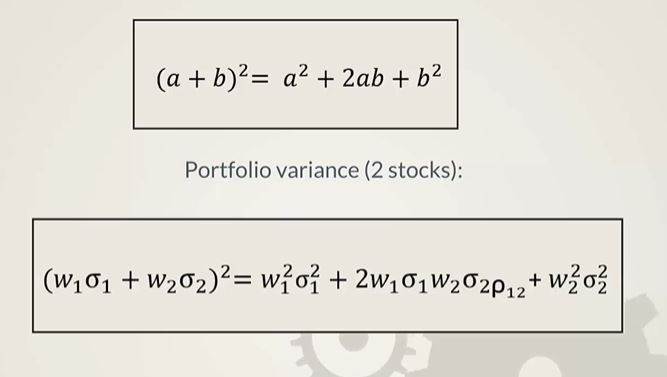


Here w1 and w2 are the weights of stocks and sigmas are the SD of the stocks.

This formula evolves from statistical theory. We need this correlation coefficient to adjust for expected values. We can build on this theory when working in the field of finance, to express the correlation between two stocks.(Reason for the presence of Correlation coefficient(rho sign))

In [78]:
# Considering an equal weighted portfolio. The weights should add up to 1 in this 2 stock portfolio.
weights=np.array([0.5,0.5])

Calculating Portfolio Variance:

In [79]:
# Portfolio variance = Weights transposed x (Covariance matrix x Weights) 
# credits: https://stackoverflow.com/questions/47479225/calculating-portfolio-variance-and-volatility-in-python
portfolio_var=np.dot(weights.T,np.dot(cov_returns*250,weights))
portfolio_var = round(portfolio_var,4)
portfolio_var

0.0573

Calculating Portfolio volatility(SD)

In [80]:
portfolio_vol=(np.dot(weights.T,np.dot(cov_returns * 250,weights)))**0.5
portfolio_vol

0.23929447620959687

Calculating Diversifying risk and undiversifying risk:

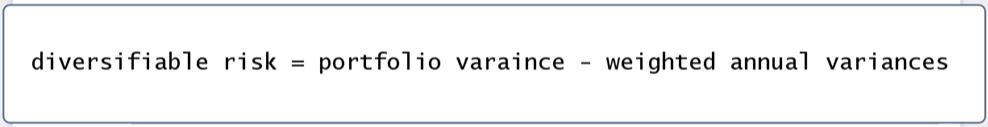

In [81]:
ITC_var_a=ITC_var*250
Hdfc_Life_var_a=Hdfc_Life_var*250
ITC_var_a

0.06548091197539012

In [82]:
Hdfc_Life_var_a

0.11310111037303862

In [83]:
diversifiable_risk=portfolio_var-(weights[0]**2 * ITC_var_a)-(weights[0]**2 * Hdfc_Life_var_a)
diversifiable_risk = round(diversifiable_risk,4)
diversifiable_risk

0.0127

The non-diversifiable risk is represented by the variance of each stock (which, per se, equals the standard deviation raised to the power of 2), multiplied by the weight associated to this stock raised to the power of two. Thus, you are having (the weight multiplied by the standard deviation of the stock) raised to the power of 2.

The remaining part is the diversifiable risk. This is the part that also depends on the correlation between the two stocks. Therefore, it equals 2 times the standard deviation of the first stock time the standard deviation of the second stock times the correlation between these two stocks.

Please note that the diversifiable risk can also be expressed as 2 times the covariance between the two stocks.

In [84]:
non_diversifiable_risk= portfolio_var-diversifiable_risk
non_diversifiable_risk = round(non_diversifiable_risk,4)
non_diversifiable_risk

0.0446

In [85]:
print(f'The Total risk of the portfolio is:{portfolio_var*100}%')
print(f'The Diversifiable risk of the portfolio is:{diversifiable_risk*100}%')
print(f'The Non-Diversifiable(Market) risk of the portfolio is:{non_diversifiable_risk*100}%')

The Total risk of the portfolio is:5.7299999999999995%
The Diversifiable risk of the portfolio is:1.27%
The Non-Diversifiable(Market) risk of the portfolio is:4.46%
